# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Notebook Status:**  
_This notebook was AI-generated and has **not been fully verified** by a human. Please be cautious and review both the code and the results before drawing any conclusions from this analysis._

---

## Overview of the Dandiset

- **Dandiset ID:** 001174, version 0.250331.2218  
- **Title:** Calcium imaging in SMA and M1 of macaques  
- **Authors:** Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D.; Wichmann, Thomas
- **License:** CC-BY-4.0
- **Keywords:** One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens
- **Description:**  
  The study used calcium imaging to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. The dataset includes imaging and processed data as the animals were at rest or performing an arm reaching task.
- **Citation:**  
  Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; et al. (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218), DANDI Archive. [doi link](https://doi.org/10.48324/dandi.001174/0.250331.2218)

Learn more: [View Dandiset on DANDI Archive](https://dandiarchive.org/dandiset/001174/0.250331.2218)

---

## What this notebook covers

- How to load this Dandiset and NWB files using the DANDI API
- How to access and visualize fluorescence traces, event amplitudes, and ROI (cell) masks
- Demonstration with a specific NWB file: **sub-Q/sub-Q_ophys.nwb**
- Links and code for further exploration

## Required packages

This notebook assumes the following packages are already installed:
- dandi
- pynwb
- remfile
- h5py
- numpy
- matplotlib

## Loading the Dandiset and viewing assets

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}\n")

# List some NWB assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 NWB assets in the Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 NWB assets in the Dandiset:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


For this analysis, we use the NWB file **sub-Q/sub-Q_ophys.nwb** (asset ID: de07db56-e7f3-4809-9972-755c51598e8d).

**File URL:**  
https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/

You can explore this file online via [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft).

## Loading and summarizing the NWB file

The code below demonstrates how to load the NWB file for streaming access using PyNWB and remfile. Metadata and basic structure of the NWB file are shown.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session Description:", nwb.session_description)
print("Session Start Time:", nwb.session_start_time)
print("File ID:", nwb.identifier)
print("Subject ID:", nwb.subject.subject_id)
print("Subject species:", nwb.subject.species)
print("NWB acquisition keys:", list(nwb.acquisition.keys()))
print("NWB processing modules:", list(nwb.processing.keys()))

Session Description: Calcium imaging in SMA during the spontaneous condition
Session Start Time: 2022-09-15 13:16:33.129000+00:00
File ID: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Subject ID: Q
Subject species: Macaca mulatta
NWB acquisition keys: ['OnePhotonSeries']
NWB processing modules: ['ophys']


## NWB File Contents

```
File: sub-Q/sub-Q_ophys.nwb

- nwb.acquisition
    - OnePhotonSeries: Miniscope imaging data (shape: 6041, 320, 200)
- nwb.processing["ophys"]
    - Fluorescence
        - RoiResponseSeries: Fluorescence traces (shape: 6041, 40)
    - EventAmplitude: Event amplitudes (shape: 6041, 40)
    - ImageSegmentation
        - PlaneSegmentation: ROI (cell) masks (40 ROIs, image_mask shape: 40, 320, 200)
- Metadata: subject info, device, imaging plane, etc.
```

For more details, see the example code at the top of this notebook or the [Neurosift viewer link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft).

The raw imaging data was found to be low in contrast and did not reveal clearly defined cellular structure on direct visualization, so the notebook focuses on derived quantities.

## Visualizing fluorescence and event amplitude traces for example ROIs

Here we plot fluorescence and detected event amplitudes for three example ROIs (cells) from the NWB file.
Only the first 1000 timepoints are shown for clarity.

**Tip:** ROI IDs may not be contiguous; these are direct from the NWB table.

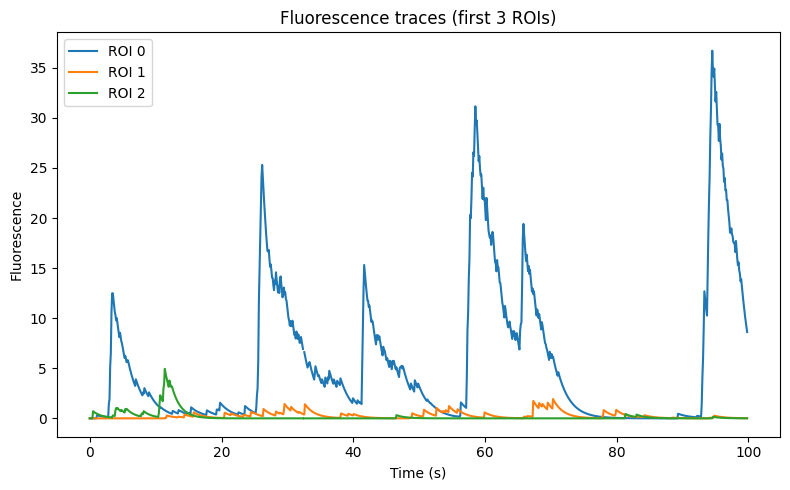

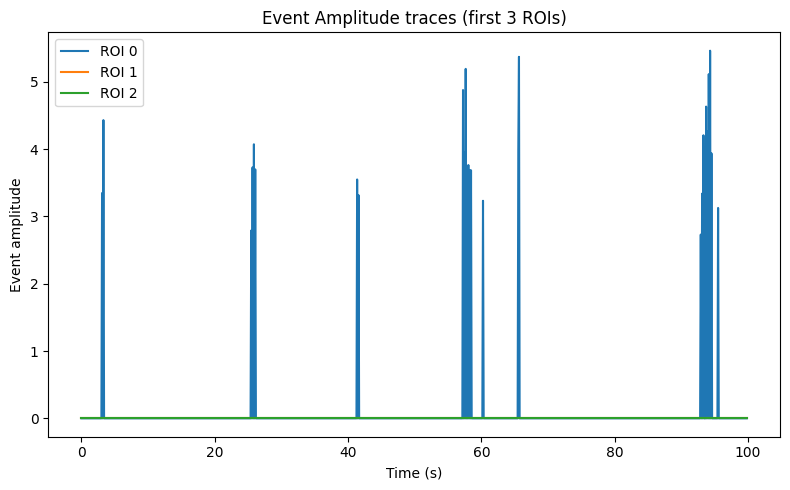

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Use the existing 'nwb' object loaded above
processing = nwb.processing["ophys"]

# Fluorescence traces
fluor = processing.data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
fluor_data = fluor.data  # shape: (6041, 40)
roi_ids = fluor.rois.table.id[:]
N_TRACES = 3
N_SAMPLES = 1000
t = np.arange(N_SAMPLES) / fluor.rate

plt.figure(figsize=(8, 5))
for i in range(N_TRACES):
    trace = fluor_data[:N_SAMPLES, i]
    plt.plot(t, trace, label=f"ROI {roi_ids[i]}")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence")
plt.title("Fluorescence traces (first 3 ROIs)")
plt.legend()
plt.tight_layout()
plt.show()

# Event Amplitude traces
eventa = processing.data_interfaces["EventAmplitude"]
eventa_data = eventa.data  # shape: (6041, 40)
roi_ids_evt = eventa.rois.table.id[:]

plt.figure(figsize=(8, 5))
for i in range(N_TRACES):
    trace = eventa_data[:N_SAMPLES, i]
    plt.plot(t, trace, label=f"ROI {roi_ids_evt[i]}")
plt.xlabel("Time (s)")
plt.ylabel("Event amplitude")
plt.title("Event Amplitude traces (first 3 ROIs)")
plt.legend()
plt.tight_layout()
plt.show()

## Visualizing ROI masks and spatial layout

Below, the spatial structure of ROI (cell) masks is visualized as a combined heatmap, and a single example ROI mask is shown for detail.
These visualizations provide insight into ROI localization and coverage in the imaging field.

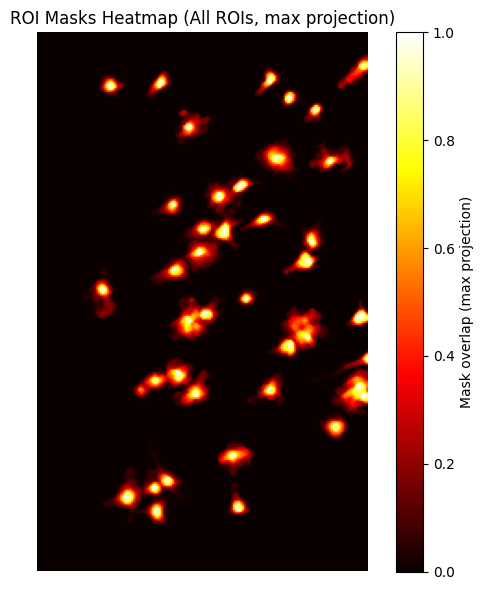

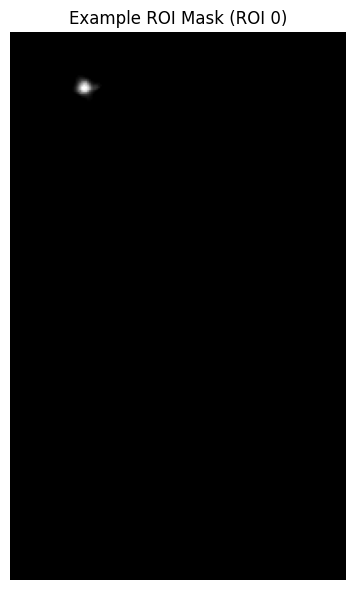

In [4]:
# ROI mask visualization
plane_seg = processing.data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
roi_masks = plane_seg["image_mask"][:]  # shape (40, 320, 200)
# Show all ROIs: max projection heatmap
roi_heatmap = np.max(roi_masks, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(roi_heatmap, cmap='hot')
plt.colorbar(label='Mask overlap (max projection)')
plt.title("ROI Masks Heatmap (All ROIs, max projection)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Show single ROI mask
EXAMPLE_ROI_IDX = 0
plt.figure(figsize=(6, 6))
plt.imshow(roi_masks[EXAMPLE_ROI_IDX], cmap='gray')
plt.title(f"Example ROI Mask (ROI {EXAMPLE_ROI_IDX})")
plt.axis('off')
plt.tight_layout()
plt.show()

## Summary and future directions

This notebook has demonstrated how to access, visualize, and explore data from Dandiset 001174, focusing on example fluorescence traces, event amplitude timecourses, and spatial ROI masks from a representative NWB file.

**Key takeaways:**
- The NWB file contains both raw and processed data, with clear cell ROI definitions and timeseries suitable for further analysis.
- Fluorescence and event timecourses allow study of neural activity patterns across identified regions.
- ROI masks provide insight into spatial coverage.

**Potential next steps for analysis:**
- Relate activity across ROIs to behavioral task epochs, if available
- Quantify pairwise correlations or co-activation across ROIs
- Analyze event timing and rates across conditions or sessions
- Explore additional NWB files for comparison between animals/sessions

For further exploration, see the [DANDI Archive](https://dandiarchive.org/dandiset/001174/0.250331.2218) and [Neurosift NWB Viewer](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft).

---

_Note: Some raw imaging data in this file is low in contrast and not directly informative, so the notebook emphasizes processed data. For rigorous scientific analysis, users should verify code and outputs with additional quality inspection._